# CAM Compression Evaluation Notebook

This notebook allows users to compare CAM data in
its original form to CAM data that has undergone three different levels of lossy compression - least conservative, middle ground, and most conservative. The
tools provided in ldcpy are intended to highlight differences due to compression
artifacts in order to assist scientist in evaluating the amount of lossy
compression to apply to their data.

The data used here are NetCDF files in "timeseries" file format, meaning
that each NetCDF file contains one (major) output variable (e.g., surface
temperature or precipitation rate) and spans multiple timesteps (daily, monthly).

This notebook is meant to be run on NCAR's JupyterHub (https://jupyterhub.ucar.edu). We will use a subset of CAM data on glade located in /glade/p/cisl/asap/CAM_lossy_test_data_31.


In [123]:
# Add ldcpy root to system path
import sys

import astropy

sys.path.insert(0, '../../../')

# Import ldcpy package
# Autoreloads package everytime the package is called, so changes to code will be reflected in the notebook if the above sys.path.insert(...) line is uncommented.
%load_ext autoreload
%autoreload 2

# suppress all of the divide by zero warnings
import warnings

warnings.filterwarnings("ignore")

import ldcpy

# display the plots in this notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Overview


This notebook demonstrates the use of ldcpy on several CAM variables of interest. It assumes that users are familiar with basic functions of ldcpy, as shown in the Tutorial Notebook. The following CAM variables are used in this notebook:

Daily:
- TS (Average Daily Surface Temperature)
- PRECT (Average Total Precipitation)
- TAUX (Zonal surface stress)
- FLUT (Upward longwave flux at top of model)
- Z500 (500 mb geo-potential height)
- LHFLX (Surface latent heat flux)

Monthly:
- TS (Average Daily Surface Temperature)
- U* (Zonal wind component)
- FLNS (Net upward longwave flux at surface)
- CCN3* (CCN concentration at S=0.1%)
- CLOUD* (Cloud fraction)
- TMQ (Total precipitable water)
- PS (Surface pressure)

Where * indicates a 3D variable.

For information about installation, see
[these instructions](https://ldcpy.readthedocs.io/en/latest/installation.html),
and for information about usage, see the API reference
[here](https://ldcpy.readthedocs.io/en/latest/api.html#ldcpy.plot.plot),
and the [Tutorial Notebook](./TutorialNotebook.ipynb).

## Loading Datasets and Viewing Metadata


In [2]:
dataDir = "/glade/p/cisl/asap/CAM_lossy_test_data_31"
cols_daily = {}
for daily_variable in ["TS", "PRECT", "TAUX", "FLUT", "Z500", "LHFLX"]:
    cols_daily[daily_variable] = ldcpy.open_datasets(
        "cam-fv",
        [daily_variable],
        [
            f"{dataDir}/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{daily_variable}.20060101-20071231.nc",
            f"{dataDir}/not_good/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{daily_variable}.20060101-20071231.nc",
            f"{dataDir}/most_aggressive/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{daily_variable}.20060101-20071231.nc",
            f"{dataDir}/middle_ground/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{daily_variable}.20060101-20071231.nc",
            f"{dataDir}/most_conservative/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h1.{daily_variable}.20060101-20071231.nc",
        ],
        [
            "orig",
            "not_good",
            "most_aggressive",
            "middle_ground",
            "most_conservative",
        ],
    )

dataset size in GB 0.81

dataset size in GB 0.81

dataset size in GB 0.81

dataset size in GB 0.81

dataset size in GB 0.81

dataset size in GB 0.81



In [3]:
dataDir = "/glade/p/cisl/asap/CAM_lossy_test_data_31"
cols_monthly = {}
for monthly_variable in ["TS", "U", "FLNS", "CCN3", "CLOUD", "TMQ", "PS"]:
    cols_monthly[monthly_variable] = ldcpy.open_datasets(
        "cam-fv",
        [monthly_variable],
        [
            f"{dataDir}/orig/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{monthly_variable}.200601-201012.nc",
            f"{dataDir}/not_good/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{monthly_variable}.200601-201012.nc",
            f"{dataDir}/most_aggressive/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{monthly_variable}.200601-201012.nc",
            f"{dataDir}/middle_ground/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{monthly_variable}.200601-201012.nc",
            f"{dataDir}/most_conservative/b.e11.BRCP85C5CNBDRD.f09_g16.031.cam.h0.{monthly_variable}.200601-201012.nc",
        ],
        [
            "orig",
            "not_good",
            "most_aggressive",
            "middle_ground",
            "most_conservative",
        ],
    )

dataset size in GB 0.07

dataset size in GB 1.99

dataset size in GB 0.07

dataset size in GB 1.99

dataset size in GB 1.99

dataset size in GB 0.07

dataset size in GB 0.07



## Getting Started

The next several sections are designed to help users get started analyzing the variables that may be of interest to them. For each of these sections, we use timestep 0 to compare summary statistics. For the spatial and time series plots, we average over the appropriate dimensions.

### Daily TS - Average Daily Surface Temperature

Here we take a look at timestep zero for the TS variable and compare it to the original data at various compression levels. Comparing across multiple datasets can take some time, this may take a few minutes to run.

#### Summary Statistics

In [4]:
ds = cols_daily["TS"].isel(time=0)
ldcpy.compare_stats(
    ds,
    "TS",
    ["orig", "not_good", "most_aggressive", "middle_ground", "most_conservative"],
    significant_digits=6,
)

orig not_good most_aggressive middle_ground  \
mean                   275.13  275.124          275.13        275.13   
variance              510.339  510.794         510.334       510.338   
standard deviation    22.5909  22.6009         22.5908       22.5909   
min value             321.471      321         321.469       321.469   
max value             218.119   217.25         218.188       218.118   
probability positive        1        1               1             1   
number of zeros             0        0               0             0   

                     most_conservative  
mean                            275.13  
variance                       510.339  
standard deviation             22.5909  
min value                      321.472  
max value                      218.119  
probability positive                 1  
number of zeros                      0

not_good most_aggressive middle_ground  \
max abs diff                            3.53293        0.222534     0.0137939   
min abs diff                                  0               0             0   
mean abs diff                          0.572366       0.0465967    0.00323322   
mean squared diff                   4.31875e-05     3.03919e-08   3.50583e-11   
root mean squared diff                 0.726938       0.0592279    0.00409832   
normalized root mean squared diff    0.00703364     0.000573072   3.96542e-05   
normalized max pointwise error        0.0326874      0.00208172   0.000133466   
pearson correlation coefficient        0.999483        0.999997             1   
ks p-value                          1.79585e-42        0.999252             1   
spatial relative error(% > 0.0001)      97.1445           63.01             0   
max spatial relative error            0.0131037     0.000829302   5.02262e-05   
Data SSIM                              0.798456        0.979638      0.998251   

                                   most_conservative  
max abs diff                             0.000854492  
min abs diff                                       0  
mean abs diff                            0.000202335  
mean squared diff                        1.51672e-12  
root mean squared diff                    0.00025647  
normalized root mean squared diff        2.48153e-06  
normalized max pointwise error           8.26782e-06  
pearson correlation coefficient                    1  
ks p-value                                         1  
spatial relative error(% > 0.0001)                 0  
max spatial relative error               3.33192e-06  
Data SSIM                                   0.999924

#### Plotting the Data

Viewing the North_South contrast variance data in spatial format is done below:

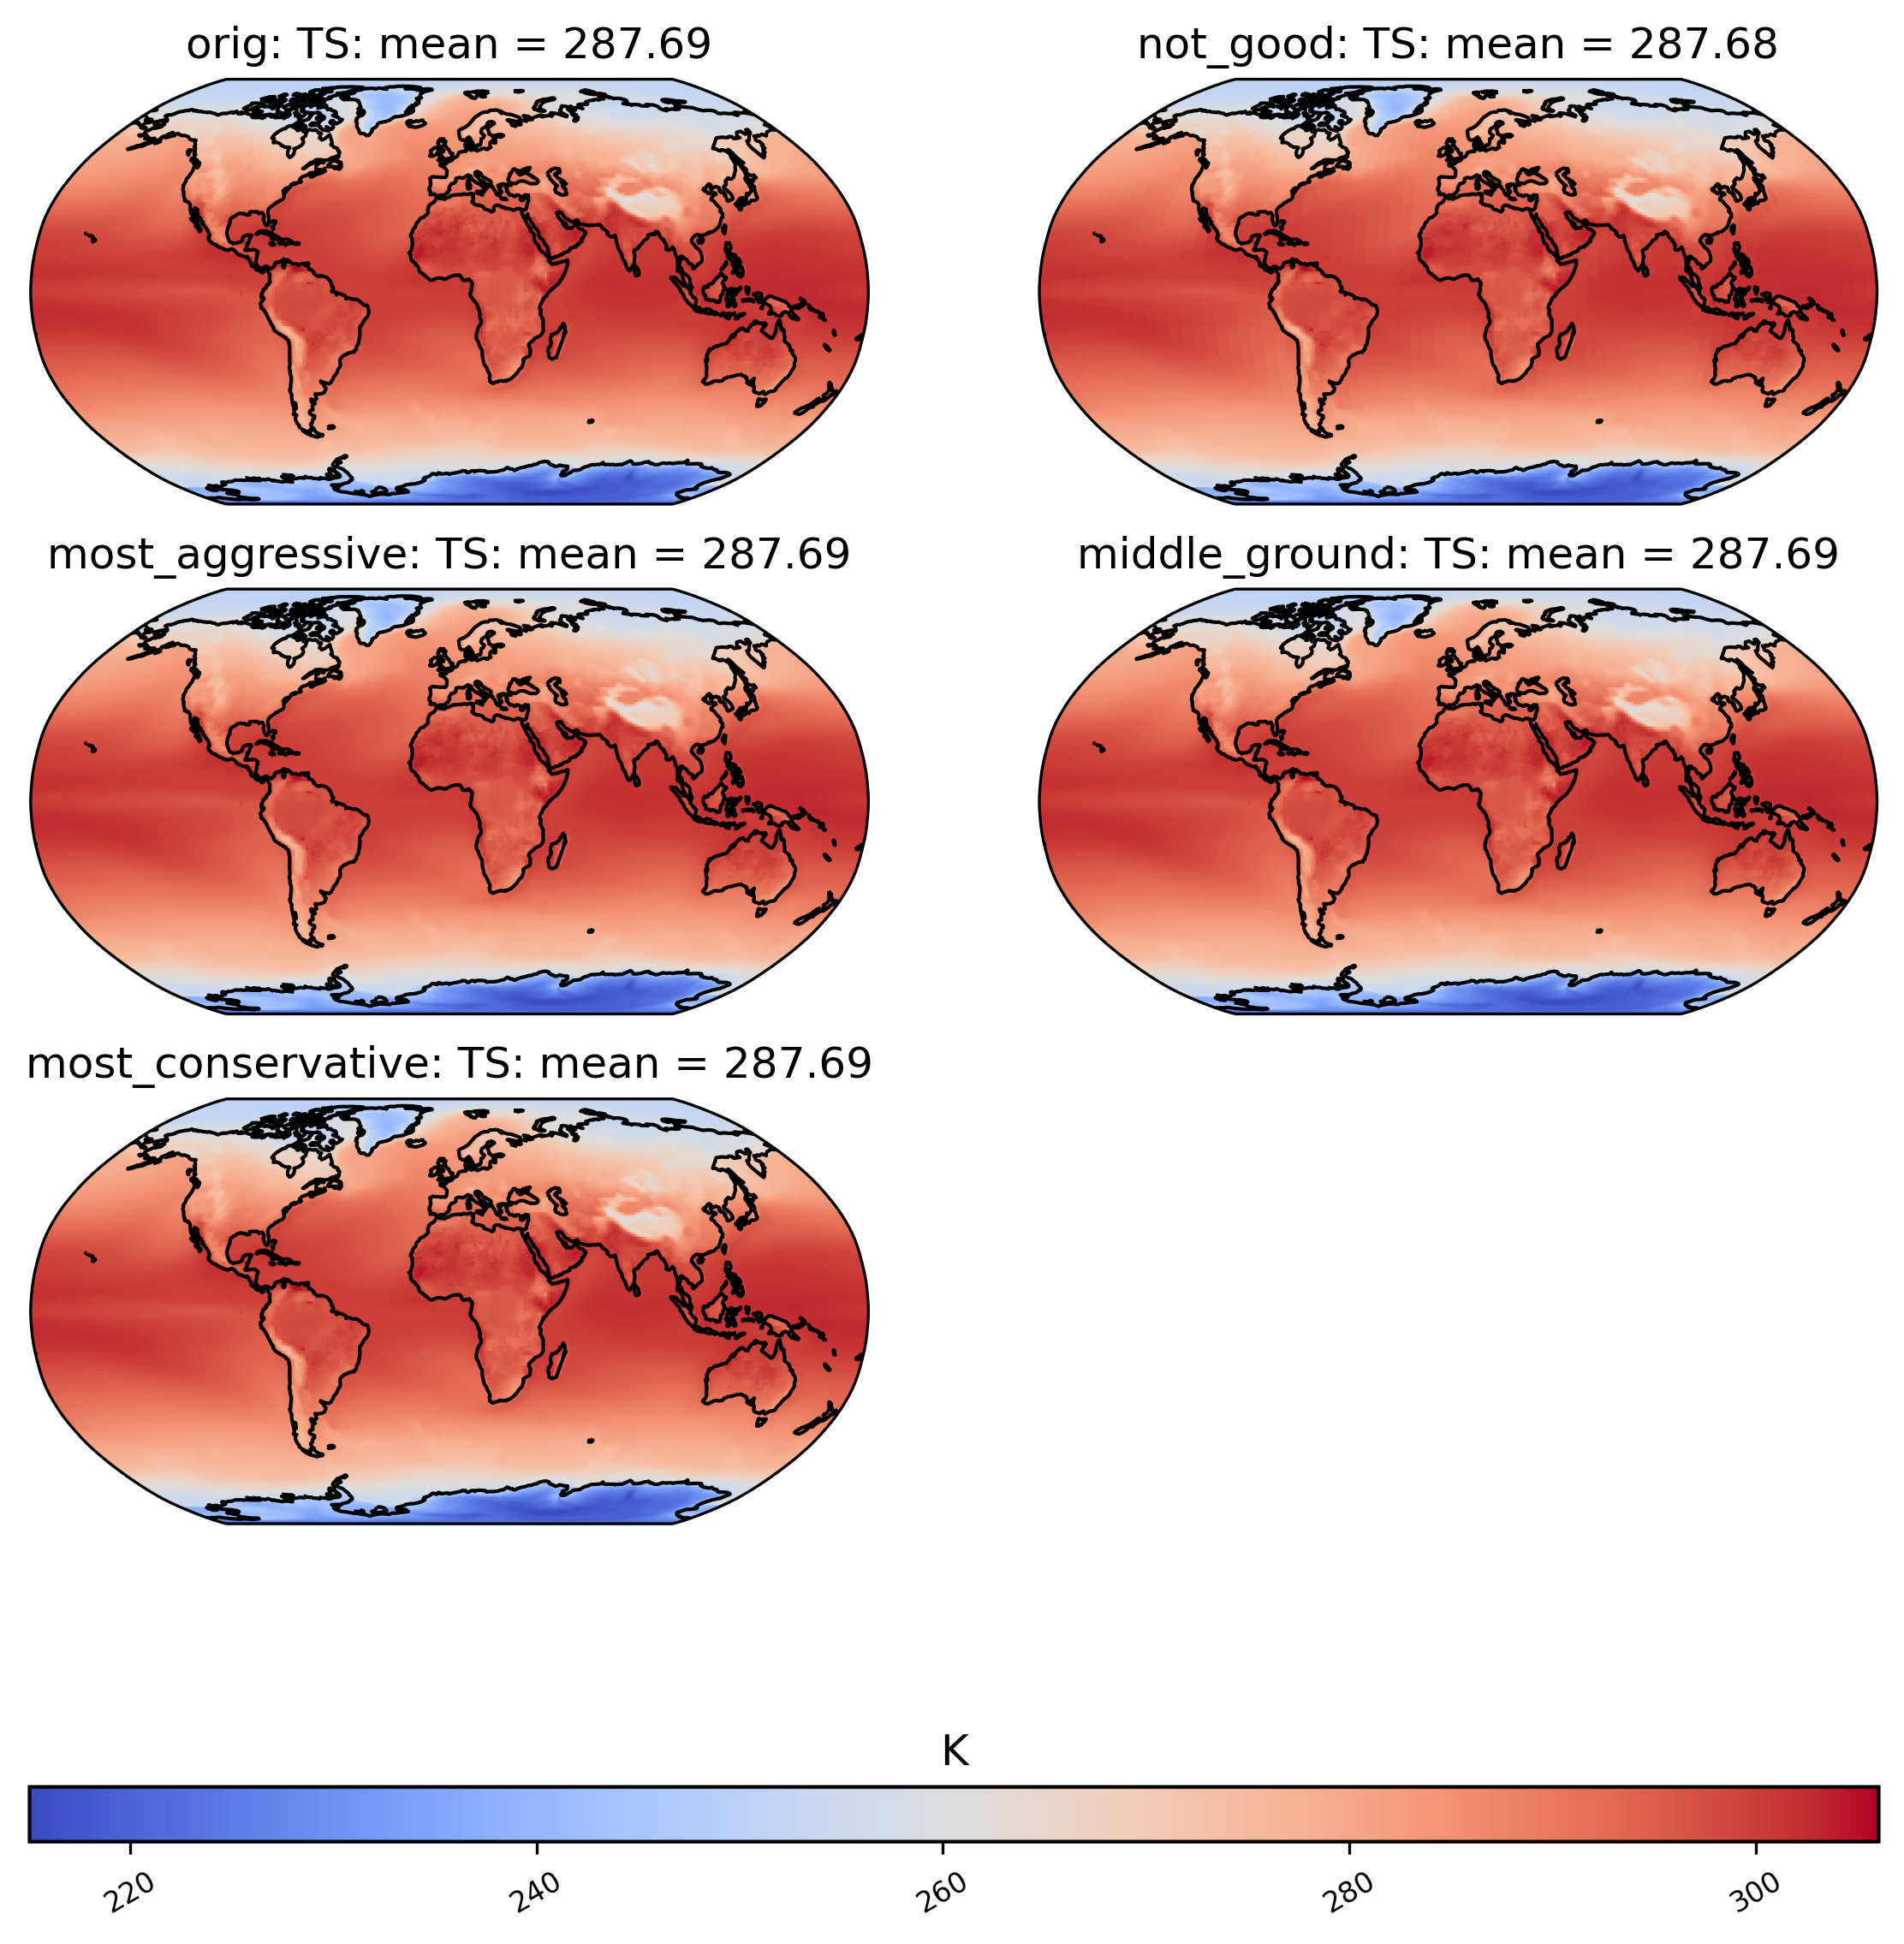

In [5]:
ldcpy.plot(
    cols_daily["TS"],
    "TS",
    sets=["orig", "not_good", "most_aggressive", "middle_ground", "most_conservative"],
    calc="mean",
)

In many cases, the mean values look identical or nearly identical to the eye, so we can use difference plots to identify regions where large compression erorrs can be found. The magnitude in the errors decreases rapidly, often plotting a side-by-side comparison of the errors is misleading because it looks like only the most compressed image has any noticeable compression errors. In these cases, it is best to plot each error plot separately. Also, it is often a good idea to set the axes_symmetric parameter to true, to center the colorbar about zero. In the following plots the mean errors for two different compression levels, zfp_p_6 and zfp_p_8 are shown. Note the change in magnitude of the color scale for the separate error plots.

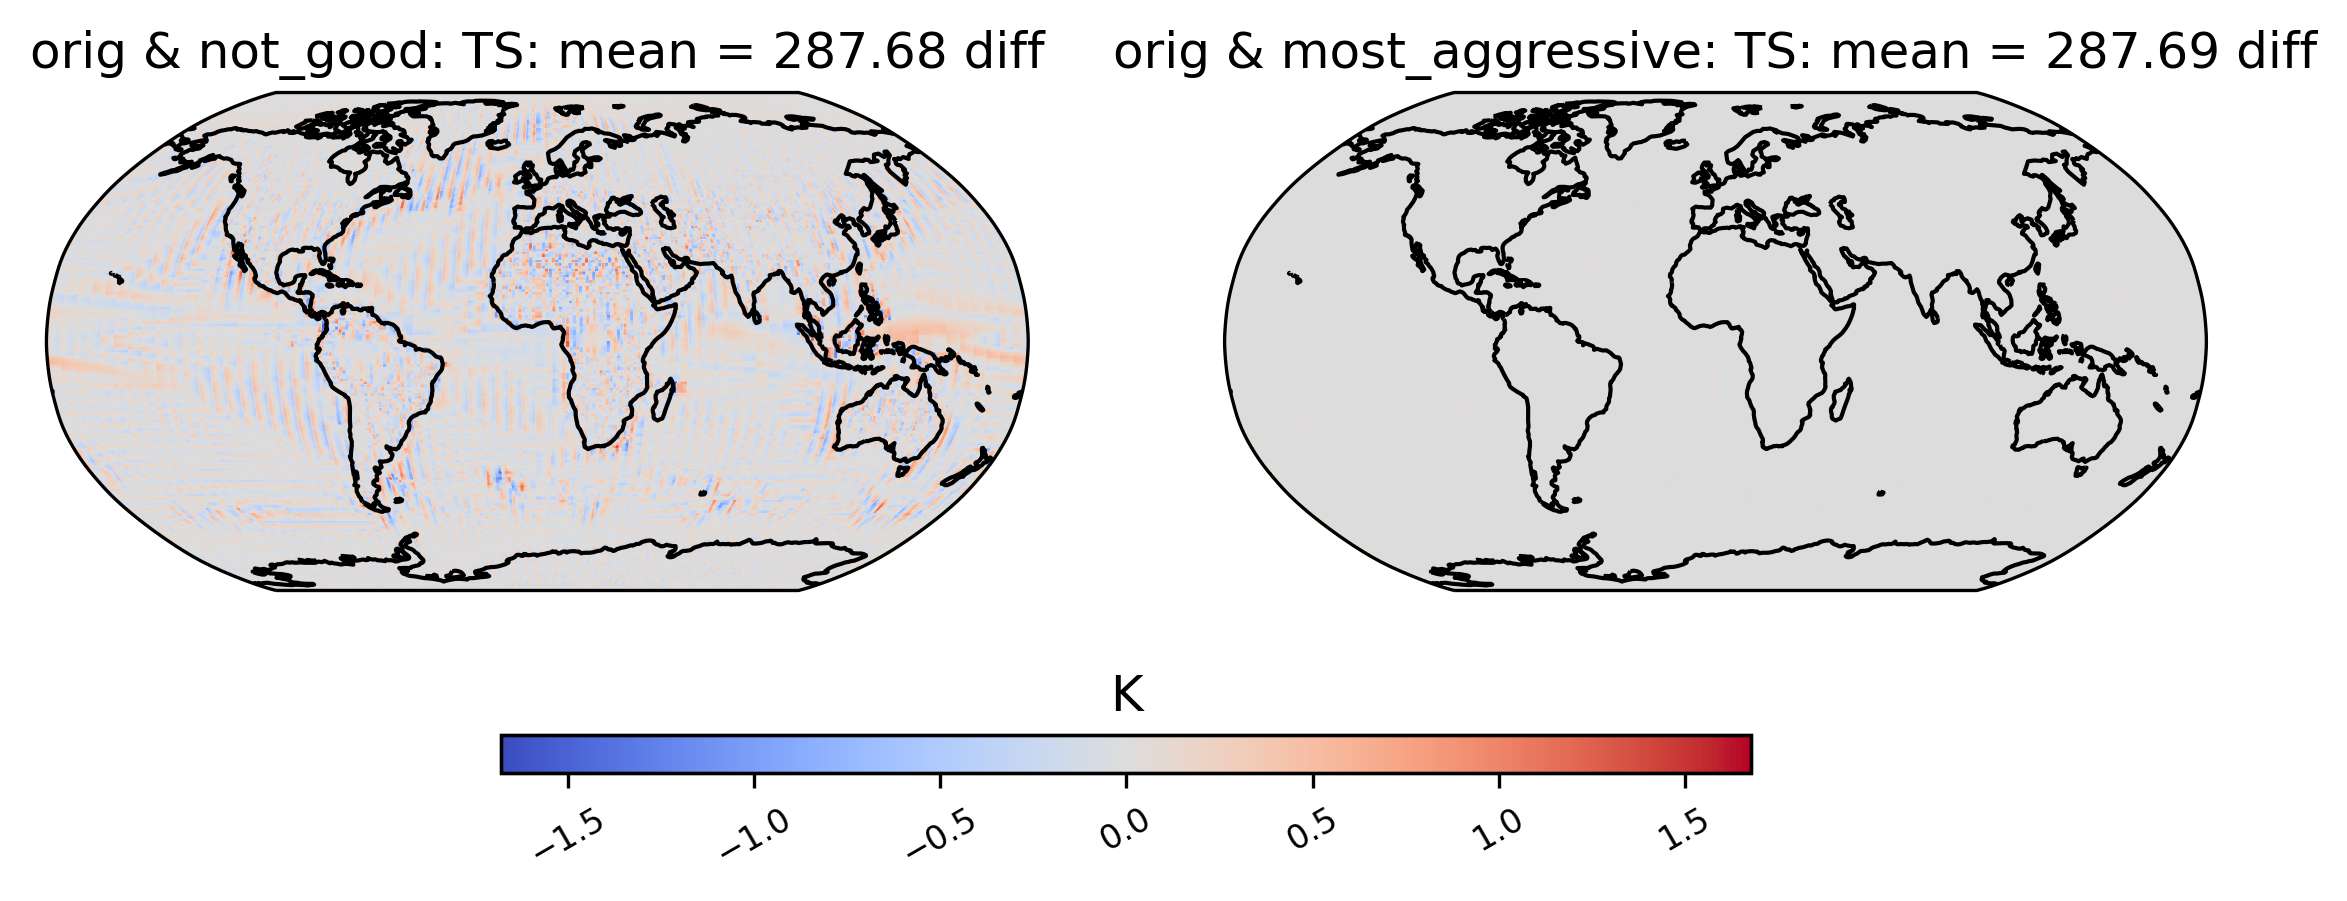

In [6]:
ldcpy.plot(
    cols_daily["TS"],
    "TS",
    sets=["orig", "not_good", "most_aggressive"],
    calc="mean",
    calc_type="diff",
    axes_symmetric=True,
)

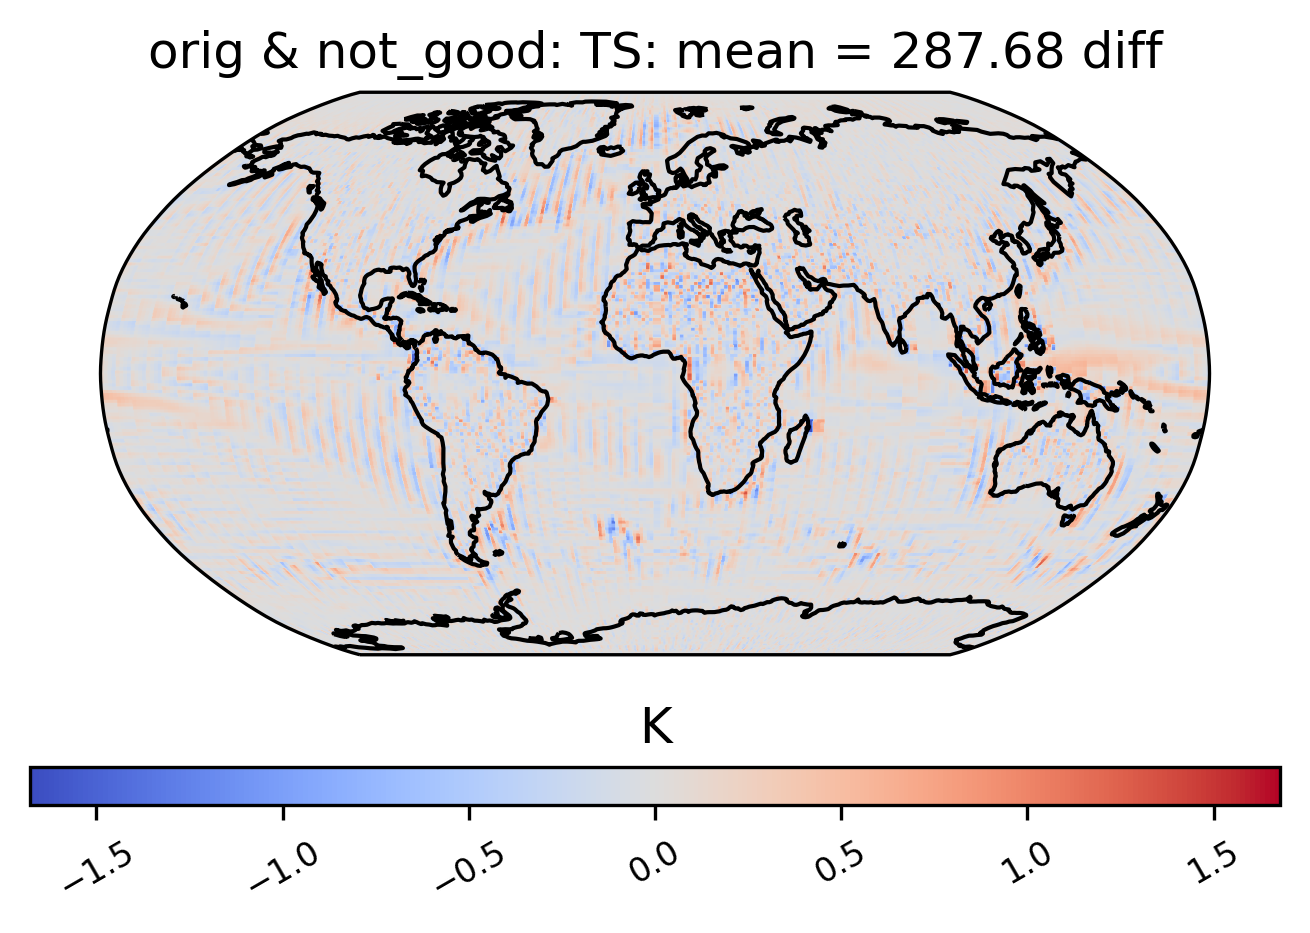

In [7]:
ldcpy.plot(
    cols_daily["TS"],
    "TS",
    sets=["orig", "not_good"],
    calc="mean",
    calc_type="diff",
    axes_symmetric=True,
)

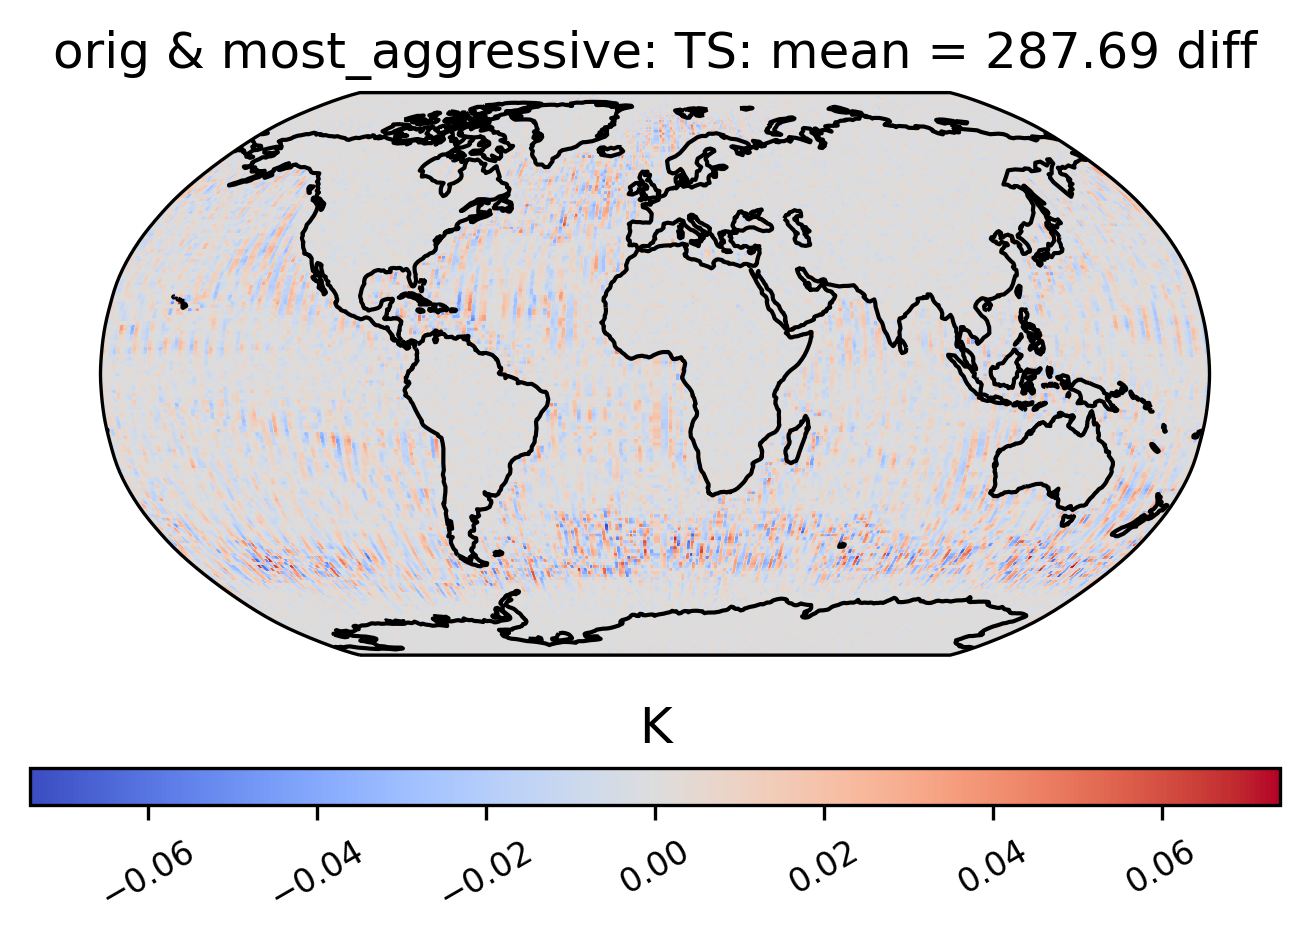

In [8]:
ldcpy.plot(
    cols_daily["TS"],
    "TS",
    sets=["orig", "most_aggressive"],
    calc="mean",
    calc_type="diff",
    axes_symmetric=True,
)

### Check for statistical significance of errors

Many error quantities have large changes in magnitude over the available range of compression levels. To avoid this issue, is may be best to plot each of these separately, or only compare two or three compression levels at a time using each plot() call. 

The below plots check two lightly compressed datasets for statistical significance in errors (under the null hypothesis of mean zero errors). Interestingly, among these datasets is is the least-compressed dataset that exhibits the most bias in the errors at each point.

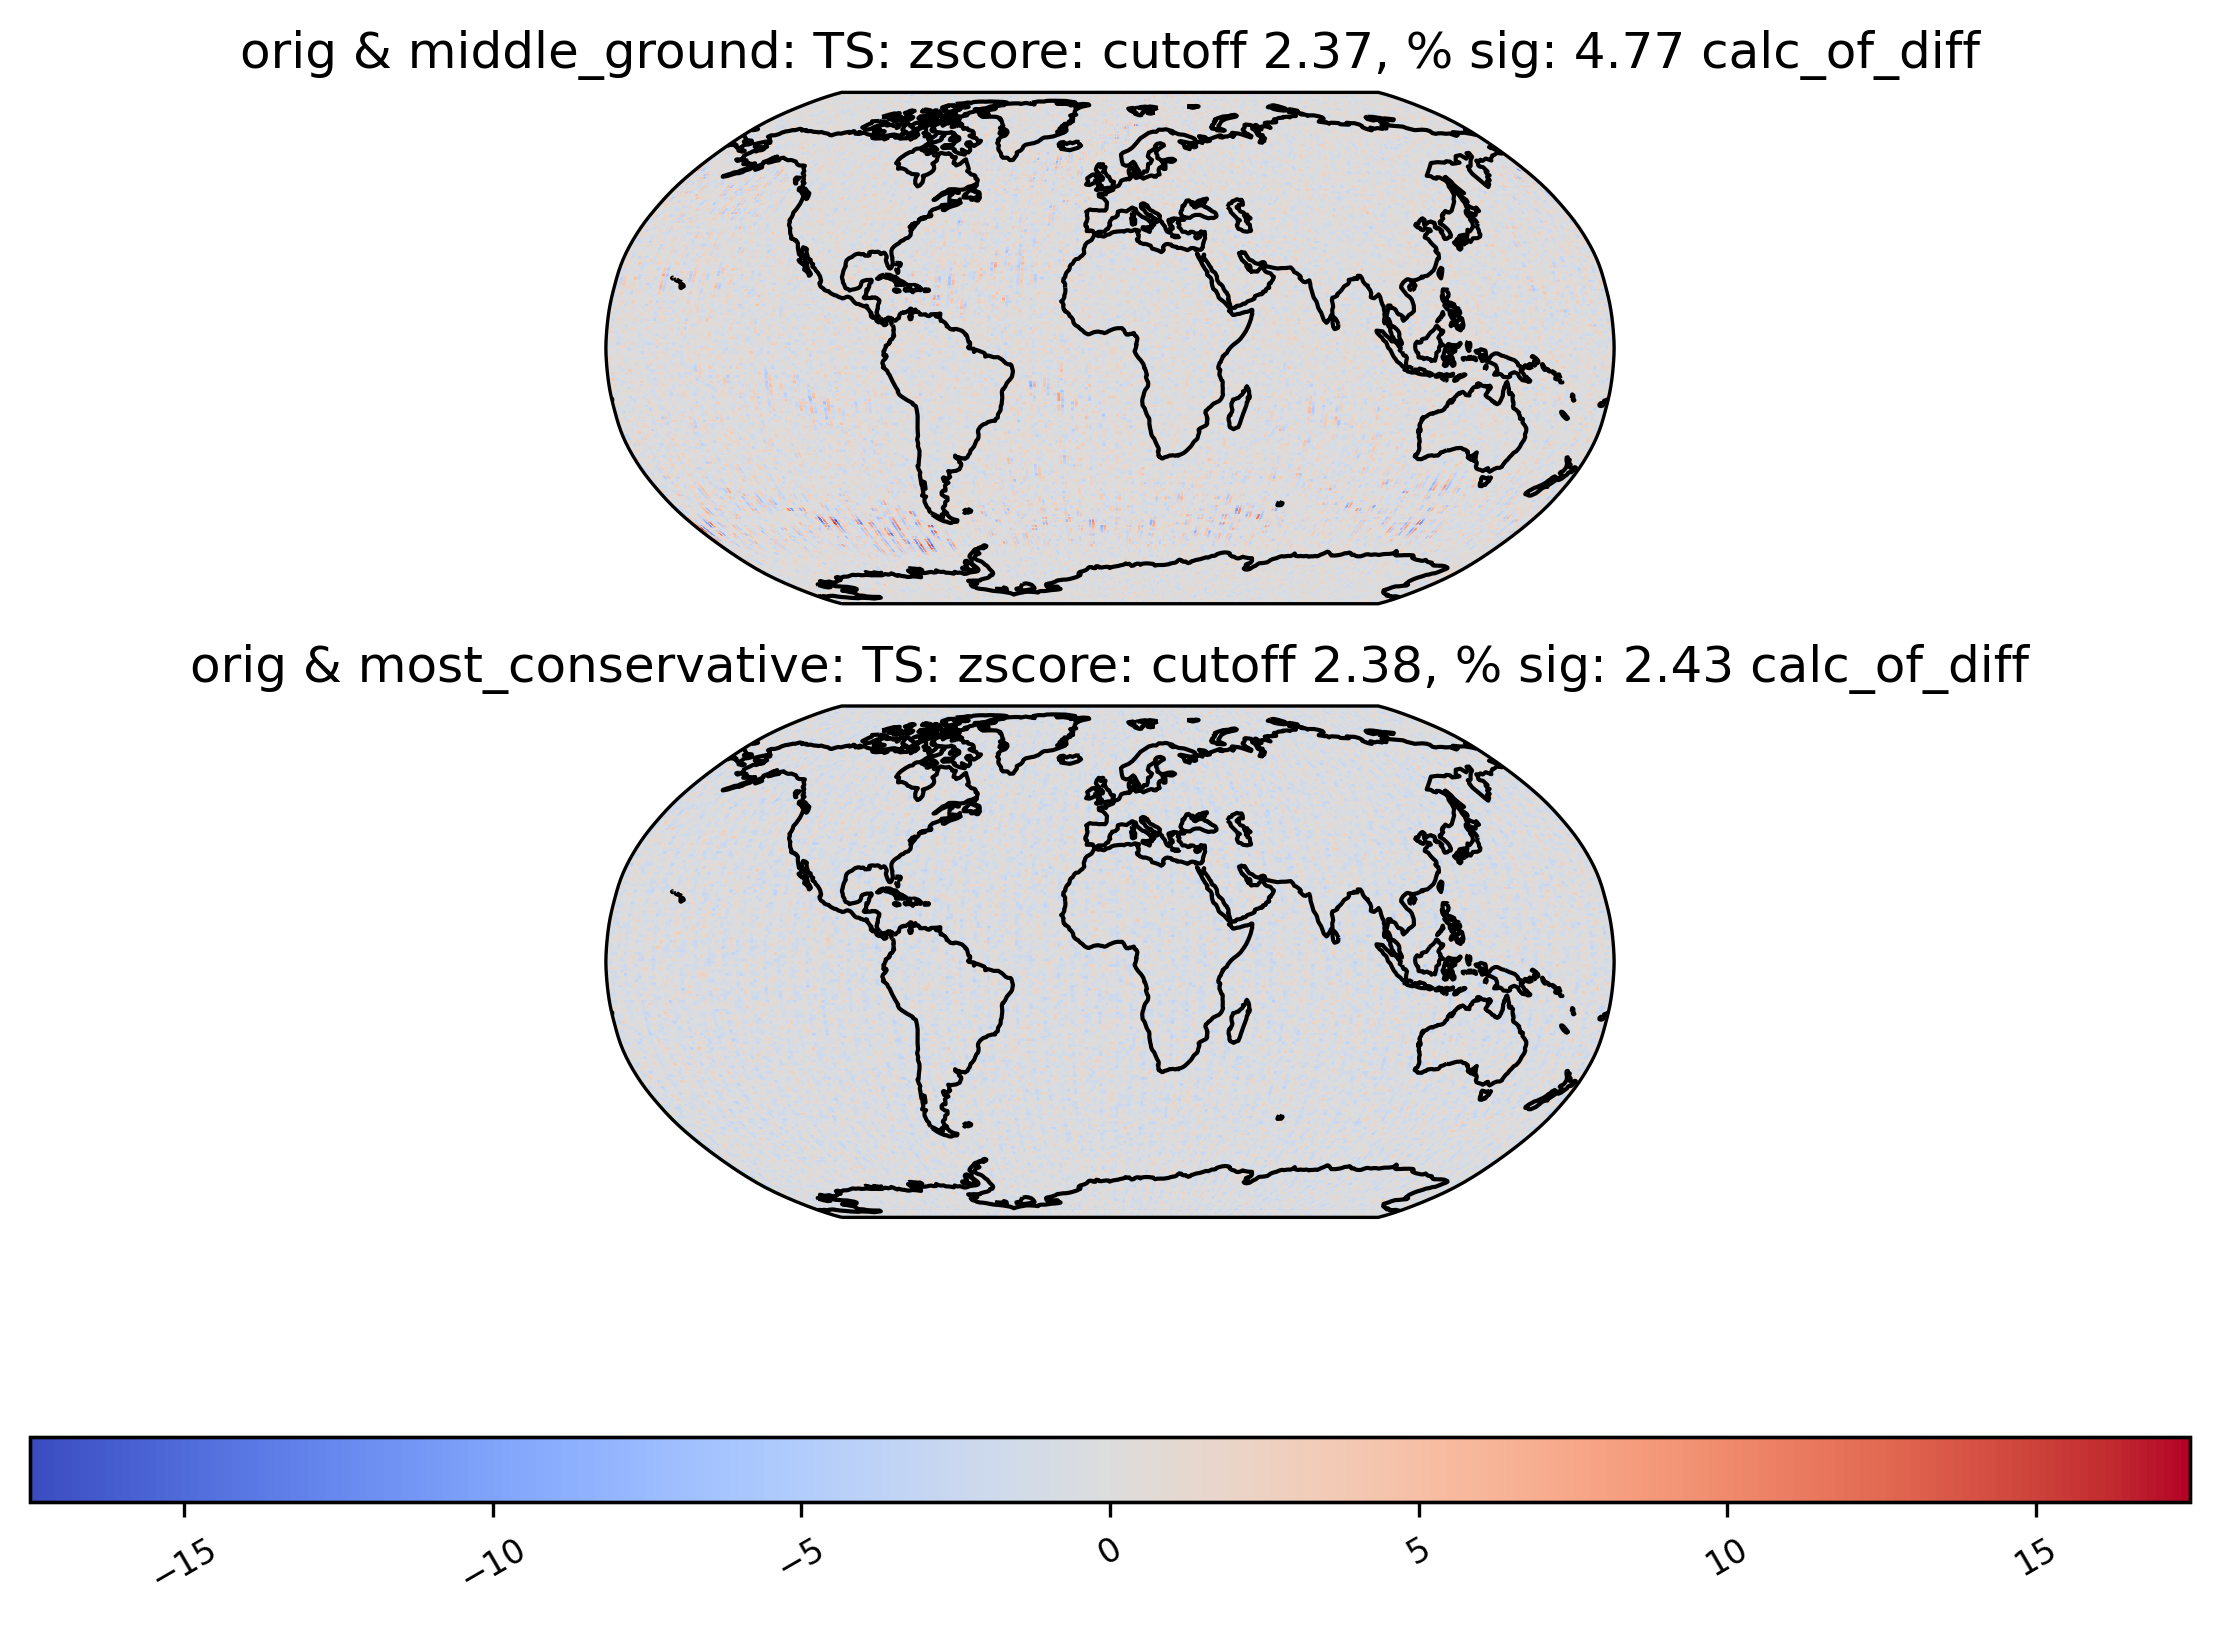

In [9]:
ldcpy.plot(
    cols_daily["TS"],
    "TS",
    sets=["orig", "middle_ground", "most_conservative"],
    calc="zscore",
    calc_type="calc_of_diff",
    axes_symmetric=True,
)

### Create a histogram of the errors at a particular point

We can create a histogram of the time-series of errors at a particular point. Indeed, we find that the most lightly-compressed dataset has errors that are smaller in magnitude, but appear to be biased in one direction.

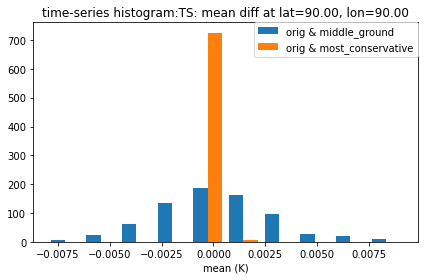

In [10]:
ldcpy.plot(
    cols_daily["TS"],
    "TS",
    sets=["orig", "middle_ground", "most_conservative"],
    calc="mean",
    calc_type="diff",
    plot_type="histogram",
    lat=90,
    lon=90,
)

### Create a histogram of the errors at a particular point

We can grab the data values if we want to use them for further analysis. The following code selects the data for a single compression level and location, then manually computes the histogram data:

In [11]:
# get the orig dataset
orig_data = cols_daily["TS"]["TS"].sel(collection="orig", lat=90, lon=90)
orig_data.attrs['cell_measures'] = 'area: cell_area'

# get the zfp_p_22 dataset
zfp_22_data = cols_daily["TS"]["TS"].sel(collection="middle_ground", lat=90, lon=90)
zfp_22_data.attrs['cell_measures'] = 'area: cell_area'

# get the zfp_p_24 dataset
zfp_24_data = cols_daily["TS"]["TS"].sel(collection="most_conservative", lat=90, lon=90)
zfp_24_data.attrs['cell_measures'] = 'area: cell_area'

In [12]:
hist_blue_data = orig_data - zfp_22_data
hist_orange_data = orig_data - zfp_24_data

In [13]:
hist_blue_data.data.compute()

array([ 1.22070312e-03,  4.34875488e-03,  2.13623047e-03, -2.38037109e-03,
        7.47680664e-04,  2.74658203e-04, -1.11389160e-03,  9.91821289e-04,
        1.75476074e-03,  3.18908691e-03, -2.57873535e-03, -6.40869141e-04,
        2.21252441e-03, -1.23596191e-03,  2.07519531e-03,  2.62451172e-03,
       -4.57763672e-04, -2.74658203e-04,  2.18200684e-03,  4.79125977e-03,
        1.57165527e-03,  1.22070312e-04,  8.23974609e-04, -4.73022461e-04,
       -1.57165527e-03, -2.80761719e-03,  5.41687012e-03,  1.20544434e-03,
       -1.19018555e-03,  1.67846680e-03,  1.92260742e-03,  9.46044922e-04,
       -3.35693359e-04, -2.71606445e-03,  3.05175781e-03,  3.02124023e-03,
        5.03540039e-04,  2.94494629e-03, -2.13623047e-03, -3.95202637e-03,
       -1.09863281e-03, -3.31115723e-03,  1.80053711e-03,  4.77600098e-03,
        4.13513184e-03,  2.89916992e-03,  3.46374512e-03, -2.34985352e-03,
        1.96838379e-03,  1.70898438e-03, -1.86157227e-03,  3.05175781e-03,
       -1.75476074e-03, -

## Analyzing Other Variables

Performing the above analysis can be done for any of the available daily or monthly variables by changing the variable setting below, and rerunning the analysis. You may use any of the compression level names specified in the open_datasets function by changing the sets list in each plot call.

In [14]:
variable = "PRECT"
frequency = "daily"

In [15]:
if frequency == "daily":
    cols = cols_daily
elif frequency == "monthly":
    cols = cols_monthly

### Summary Statistics

As mentioned above, comparing the summary statistics may take several minutes if many datasets are specified. The below code selects the first timestep and level by default.

In [124]:
ds = cols[variable].isel(time=0)
ldcpy.compare_stats(
    ds,
    variable,
    [
        "orig",
        "not_good",
        "most_aggressive",
        "middle_ground",
        "most_conservative",
    ],
    significant_digits=6,
)

orig       zfp_p_8      zfp_p_10      zfp_p_12  \
mean                   2.11782e-08   2.11767e-08   2.11803e-08   2.11786e-08   
variance               5.95429e-15   5.92473e-15   5.96091e-15   5.95554e-15   
standard deviation     7.71648e-08    7.6973e-08   7.72076e-08   7.71728e-08   
min value              4.33175e-06   4.32134e-06   4.35114e-06   4.33438e-06   
max value             -1.16413e-20  -4.47035e-08  -9.31323e-09  -1.39698e-09   
probability positive        0.9611      0.849465      0.864764      0.877007   
number of zeros               2097          3700          3353          3105   

                          zfp_p_14      zfp_p_16      zfp_p_18      zfp_p_20  \
mean                   2.11781e-08   2.11782e-08   2.11782e-08   2.11782e-08   
variance               5.95364e-15   5.95439e-15   5.95432e-15   5.95429e-15   
standard deviation     7.71605e-08   7.71654e-08   7.71649e-08   7.71647e-08   
min value              4.33112e-06   4.33193e-06   4.33179e-06   4.33173e-06   
max value             -2.32831e-10  -8.73115e-11  -5.82077e-11  -5.45697e-12   
probability positive      0.886646      0.898691      0.908456      0.919994   
number of zeros               2913          2739          2578          2299   

                          zfp_p_22      zfp_p_24  
mean                   2.11782e-08   2.11782e-08  
variance               5.95429e-15   5.95429e-15  
standard deviation     7.71648e-08   7.71648e-08  
min value              4.33175e-06   4.33175e-06  
max value             -1.36424e-12  -2.27374e-13  
probability positive      0.930592      0.937174  
number of zeros               2105          1995

zfp_p_8      zfp_p_10      zfp_p_12  \
max abs diff                        1.37862e-07   2.06232e-08   9.33917e-09   
min abs diff                                  0             0             0   
mean abs diff                       3.91898e-10   9.69485e-11   2.42666e-11   
mean squared diff                   2.35084e-24   4.53551e-24   1.85579e-25   
root mean squared diff              1.56541e-09    3.8405e-10   9.69961e-11   
normalized root mean squared diff    0.00036138   8.86594e-05   2.23919e-05   
normalized max pointwise error        0.0139455    0.00411312   0.000522657   
pearson correlation coefficient        0.999797      0.999988      0.999999   
ks p-value                          1.4218e-300  8.72323e-224  1.29967e-170   
spatial relative error(% > 0.0001)      95.9328       95.1317        91.182   
max spatial relative error          8.30636e+17   2.04713e+17   2.55892e+16   
Data SSIM                              0.987573      0.998164      0.999584   

                                        zfp_p_14     zfp_p_16     zfp_p_18  \
max abs diff                         2.19416e-09  3.26736e-10  1.13259e-10   
min abs diff                                   0            0            0   
mean abs diff                        6.11672e-12  1.51977e-12  3.86817e-13   
mean squared diff                    7.86004e-27  5.00212e-31  5.06086e-29   
root mean squared diff               2.47184e-11  5.94606e-12  1.51393e-12   
normalized root mean squared diff    5.70633e-06  1.37267e-06  3.49497e-07   
normalized max pointwise error       0.000506529  6.60027e-05  1.34376e-05   
pearson correlation coefficient                1            1            1   
ks p-value                          8.48059e-134  1.50241e-94  5.32259e-68   
spatial relative error(% > 0.0001)       78.4017      45.1642      28.5518   
max spatial relative error           5.83933e+16  1.59932e+15  1.72754e+13   
Data SSIM                               0.999666     0.999979            1   

                                       zfp_p_20     zfp_p_22     zfp_p_24  
max abs diff                        2.49845e-11  5.00222e-12   9.3614e-13  
min abs diff                                  0            0            0  
mean abs diff                       9.54749e-14  2.38303e-14  5.94732e-15  
mean squared diff                   5.68353e-34  1.99205e-32  5.50255e-33  
root mean squared diff              3.75833e-13  9.08859e-14  2.26896e-14  
normalized root mean squared diff   8.67624e-08  2.09814e-08  5.23798e-09  
normalized max pointwise error      5.76776e-06  1.14863e-06   2.0996e-07  
pearson correlation coefficient               1            1            1  
ks p-value                          2.96607e-42  6.03701e-24  2.20203e-16  
spatial relative error(% > 0.0001)      22.1644      18.6017      16.3158  
max spatial relative error          3.04188e+14   1.1405e+15  1.06238e+13  
Data SSIM                              0.999999            1            1

### Spatial Plots of Quantities and Errors

#### Spatial Plot of a Quantity

Change the quantity parameter to plot a different quantity. The available list of parameter values can be found [here](https://ldcpy.readthedocs.io/en/latest/api.html#ldcpy.plot.plot).

In [ ]:
quantity = "variance"

In [ ]:
ldcpy.plot(
    cols[variable],
    variable,
    sets=[
        "orig",
        "not_good",
        "most_aggressive",
        "middle_ground",
        "most_conservative",
    ],
    calc=quantity,
)

#### Spatial Plot of Mean Quantity Errors for Multiple Levels

In [ ]:
ldcpy.plot(
    cols[variable],
    variable,
    sets=["orig", "not_good", "middle_ground"],
    calc=quantity,
    calc_type="diff",
    axes_symmetric=True,
)

#### Spatial Plot of Mean Errors for a Single Level

In [ ]:
ldcpy.plot(
    cols[variable],
    variable,
    sets=["orig", "not_good"],
    calc=quantity,
    calc_type="diff",
    axes_symmetric=True,
)

### Time-Series Plot of Quantity

In [ ]:
ldcpy.plot(
    cols[variable],
    variable,
    sets=[
        "orig",
        "not_good",
        "most_aggressive",
        "middle_ground",
        "most_conservative",
    ],
    calc=quantity,
    plot_type="time_series",
)

### Histogram of Time-Series Plot of Quantity

In [ ]:
ldcpy.plot(
    cols[variable],
    variable,
    sets=[
        "orig",
        "not_good",
        "most_aggressive",
        "middle_ground",
        "most_conservative",
    ],
    calc=quantity,
    plot_type="histogram",
)

### Check for statistical significance of errors

In [ ]:
ldcpy.plot(
    cols[variable],
    variable,
    sets=["orig", "not_good", "middle_ground", "most_conservative"],
    calc="zscore",
    calc_type="calc_of_diff",
    axes_symmetric=True,
)

### Log transformation of quantity

In [ ]:
ldcpy.plot(
    cols[variable],
    variable,
    sets=["orig", "not_good", "middle_ground"],
    color="RdGy_r",
    calc_type="raw",
    transform="log",
    calc=quantity,
)

### Computing a quantity on the errors

In [ ]:
ldcpy.plot(
    cols[variable],
    variable,
    sets=["orig", "not_good", "middle_ground"],
    calc_type="calc_of_diff",
    calc=quantity,
    short_title=True,
)

### Get the spatial data for a derived quantity of a variable

There are several ways to get data for a derived quantity of a variable, depending on the type of calculation and the format. All of them require obtaining the original and compressed data, and computing a quantity on the errors requires computing the difference between these two datasets. This is done below.

In [ ]:
# get the orig dataset
orig_data = cols_daily[variable][variable].sel(collection="orig")
orig_data.attrs['cell_measures'] = 'area: cell_area'

# get the zfp_p_22 dataset
zfp_22_data = cols_daily[variable][variable].sel(collection="middle_ground")
zfp_22_data.attrs['cell_measures'] = 'area: cell_area'

# get the zfp_p_24 dataset
zfp_24_data = cols_daily[variable][variable].sel(collection="most_conservative")
zfp_24_data.attrs['cell_measures'] = 'area: cell_area'

diff_data_22 = orig_data - zfp_22_data
diff_data_24 = orig_data - zfp_24_data

To compute data on a single dataset, follow the steps below. These steps require as input the dataset you are interested in (here we use the original dataset), and dask will execute the command and return the data when the load() method is used on the resulting dataArray object. To compute the error between two quantities, simply perform these steps for the original and compressed datasets, subtract the resulting dataArrays, and then load the data.

In [ ]:
ds_calcs_across_time = ldcpy.Datasetcalcs(orig_data, ["time"])
ds_calcs_across_time = ldcpy.Datasetcalcs(orig_data, ["time"])
my_data_mean_across_time = ds_calcs_across_time.get_calc(quantity)
my_data_mean_across_time.load()

### Examples

Here are examples of a few interesting quantities that you can plot using the ldcpy package:

#### log(East-West Contrast Variance) for daily TS

The contrast variance measures how much quickly the data values are changing in a direction. Here we look at the east-west contrast variance for the original and several compressed datasets.

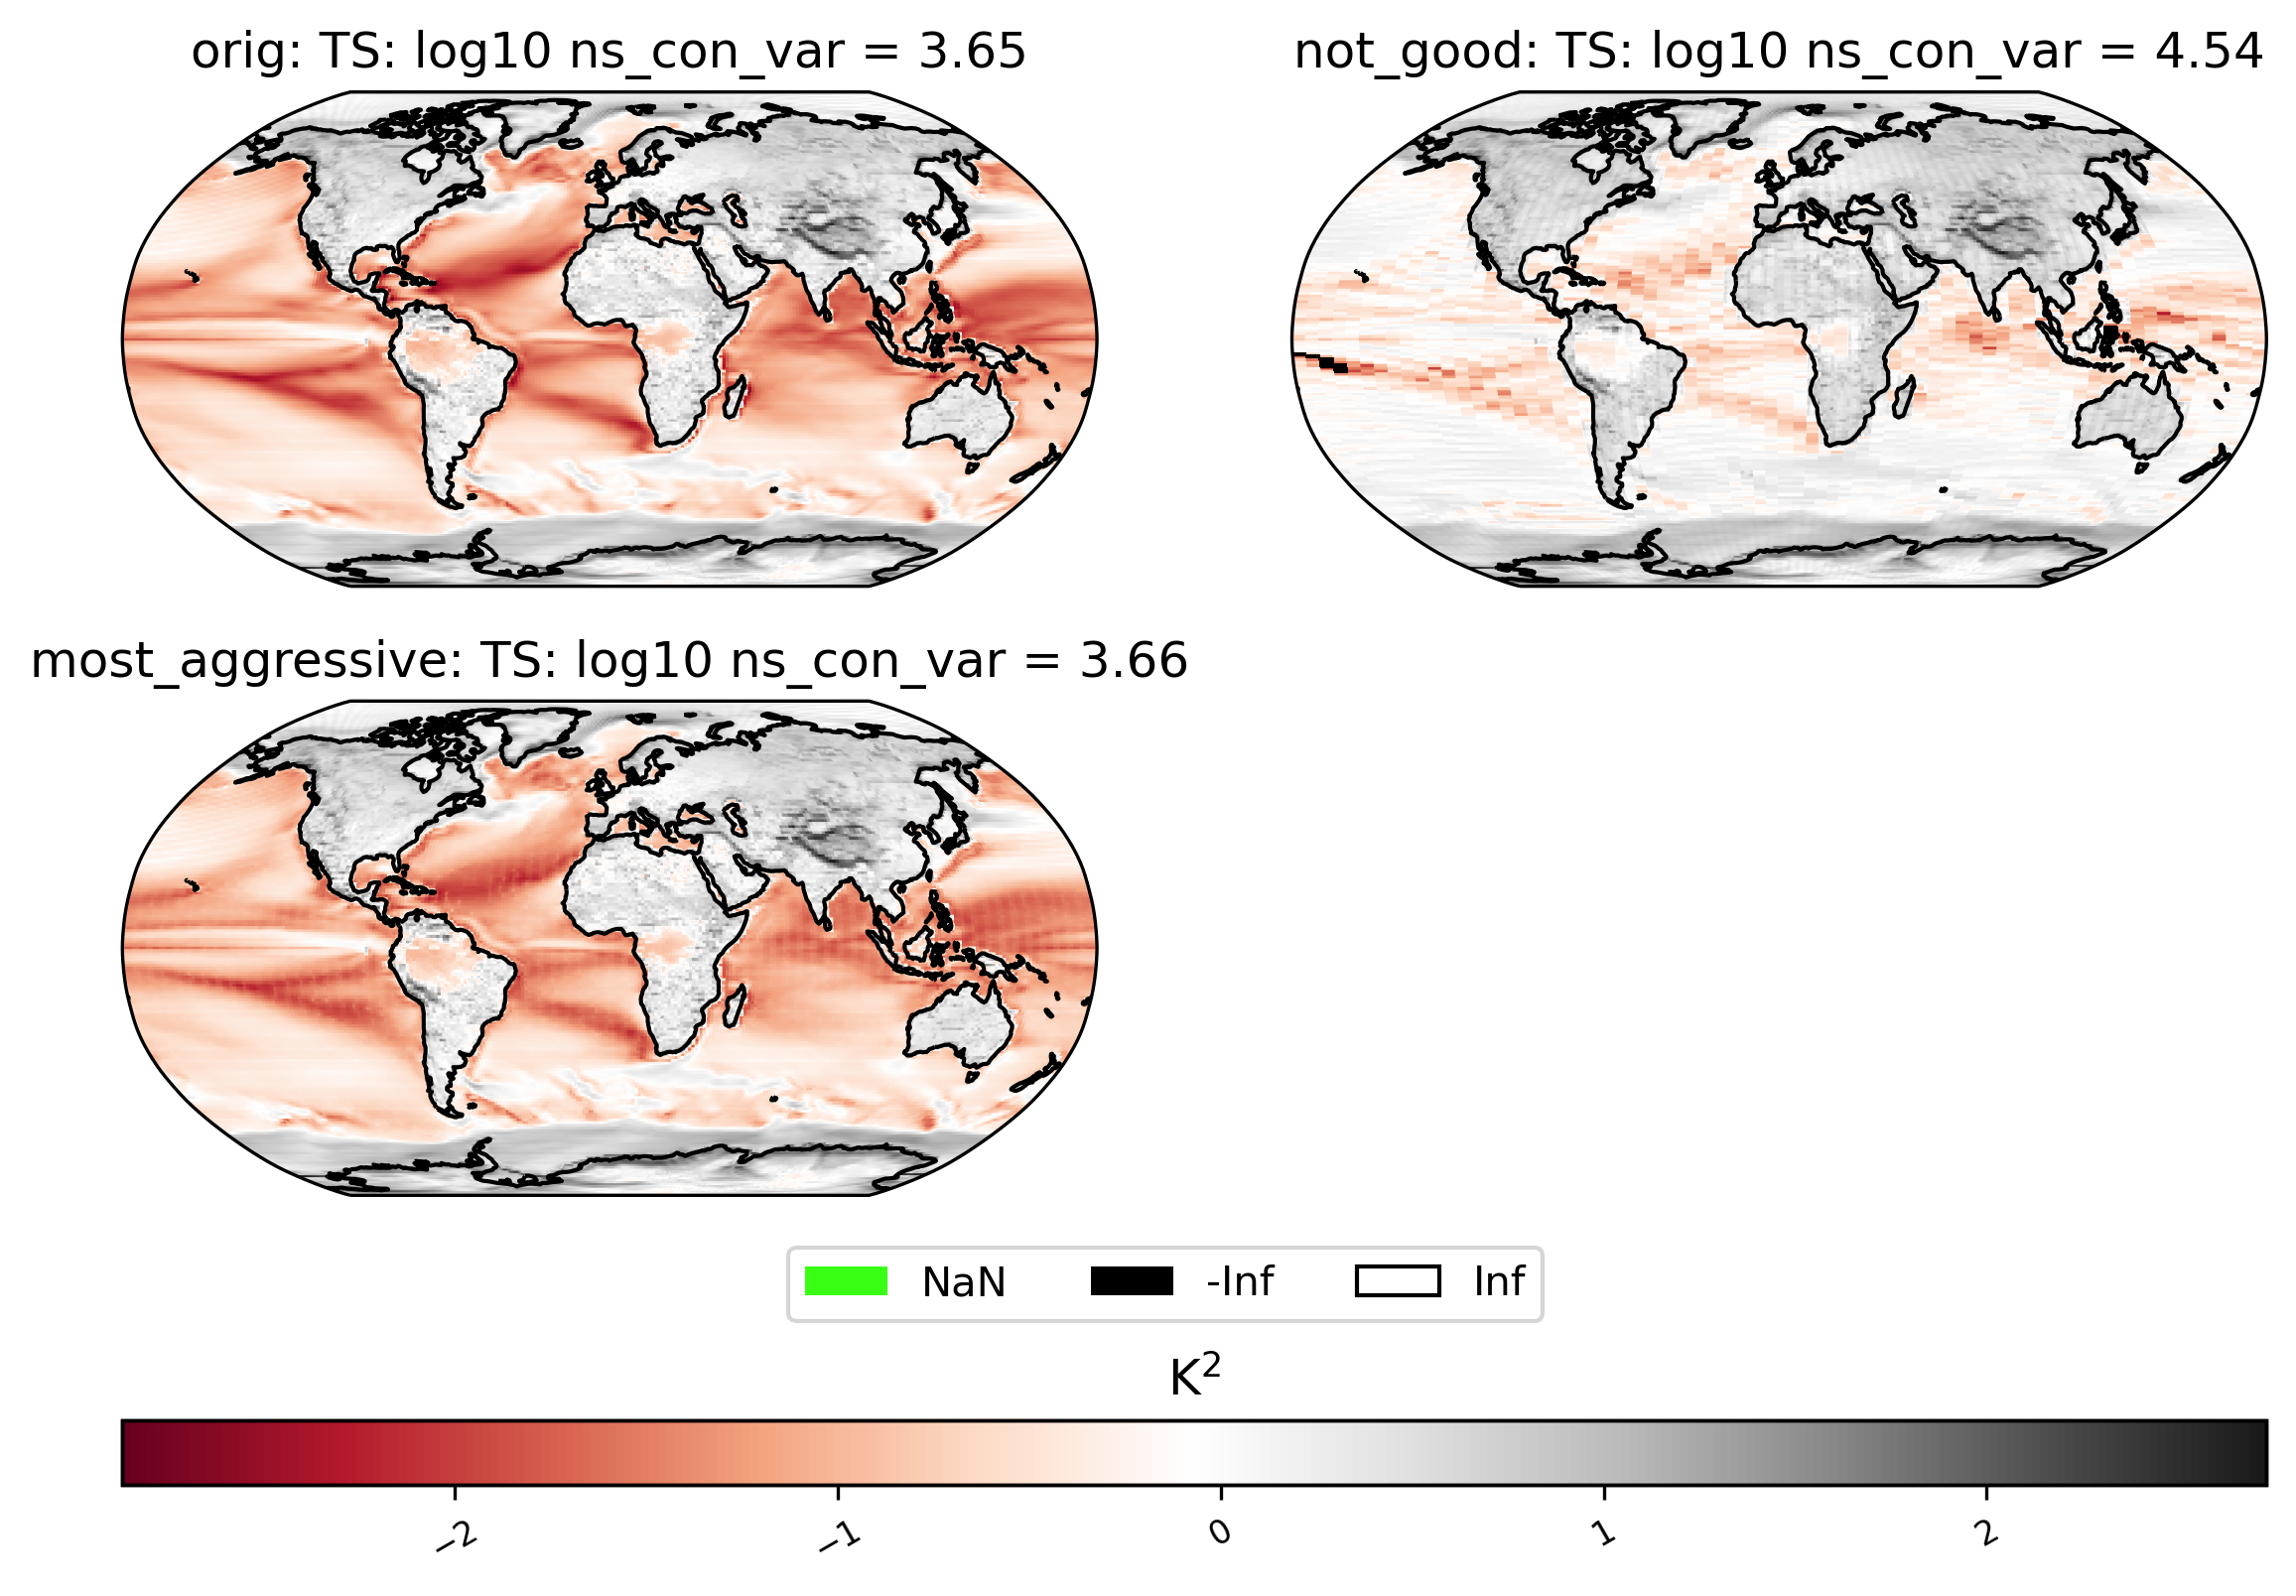

In [17]:
ldcpy.plot(
    cols_daily["TS"],
    "TS",
    sets=["orig", "not_good", "most_aggressive"],
    color="RdGy",
    calc_type="raw",
    transform="log",
    calc="ns_con_var",
)

#### Annual Harmonic Relative Ratio

This plots shows the annual harmonic relative to the average periodogram value in a neighborhood of 50 frequencies around the annual frequency

- NOTE: This assumes the values along the "time" dimension are equally spaced.
        
- NOTE: This calc returns a lat-lon array regardless of aggregate dimensions, so can only be used in a spatial plot.

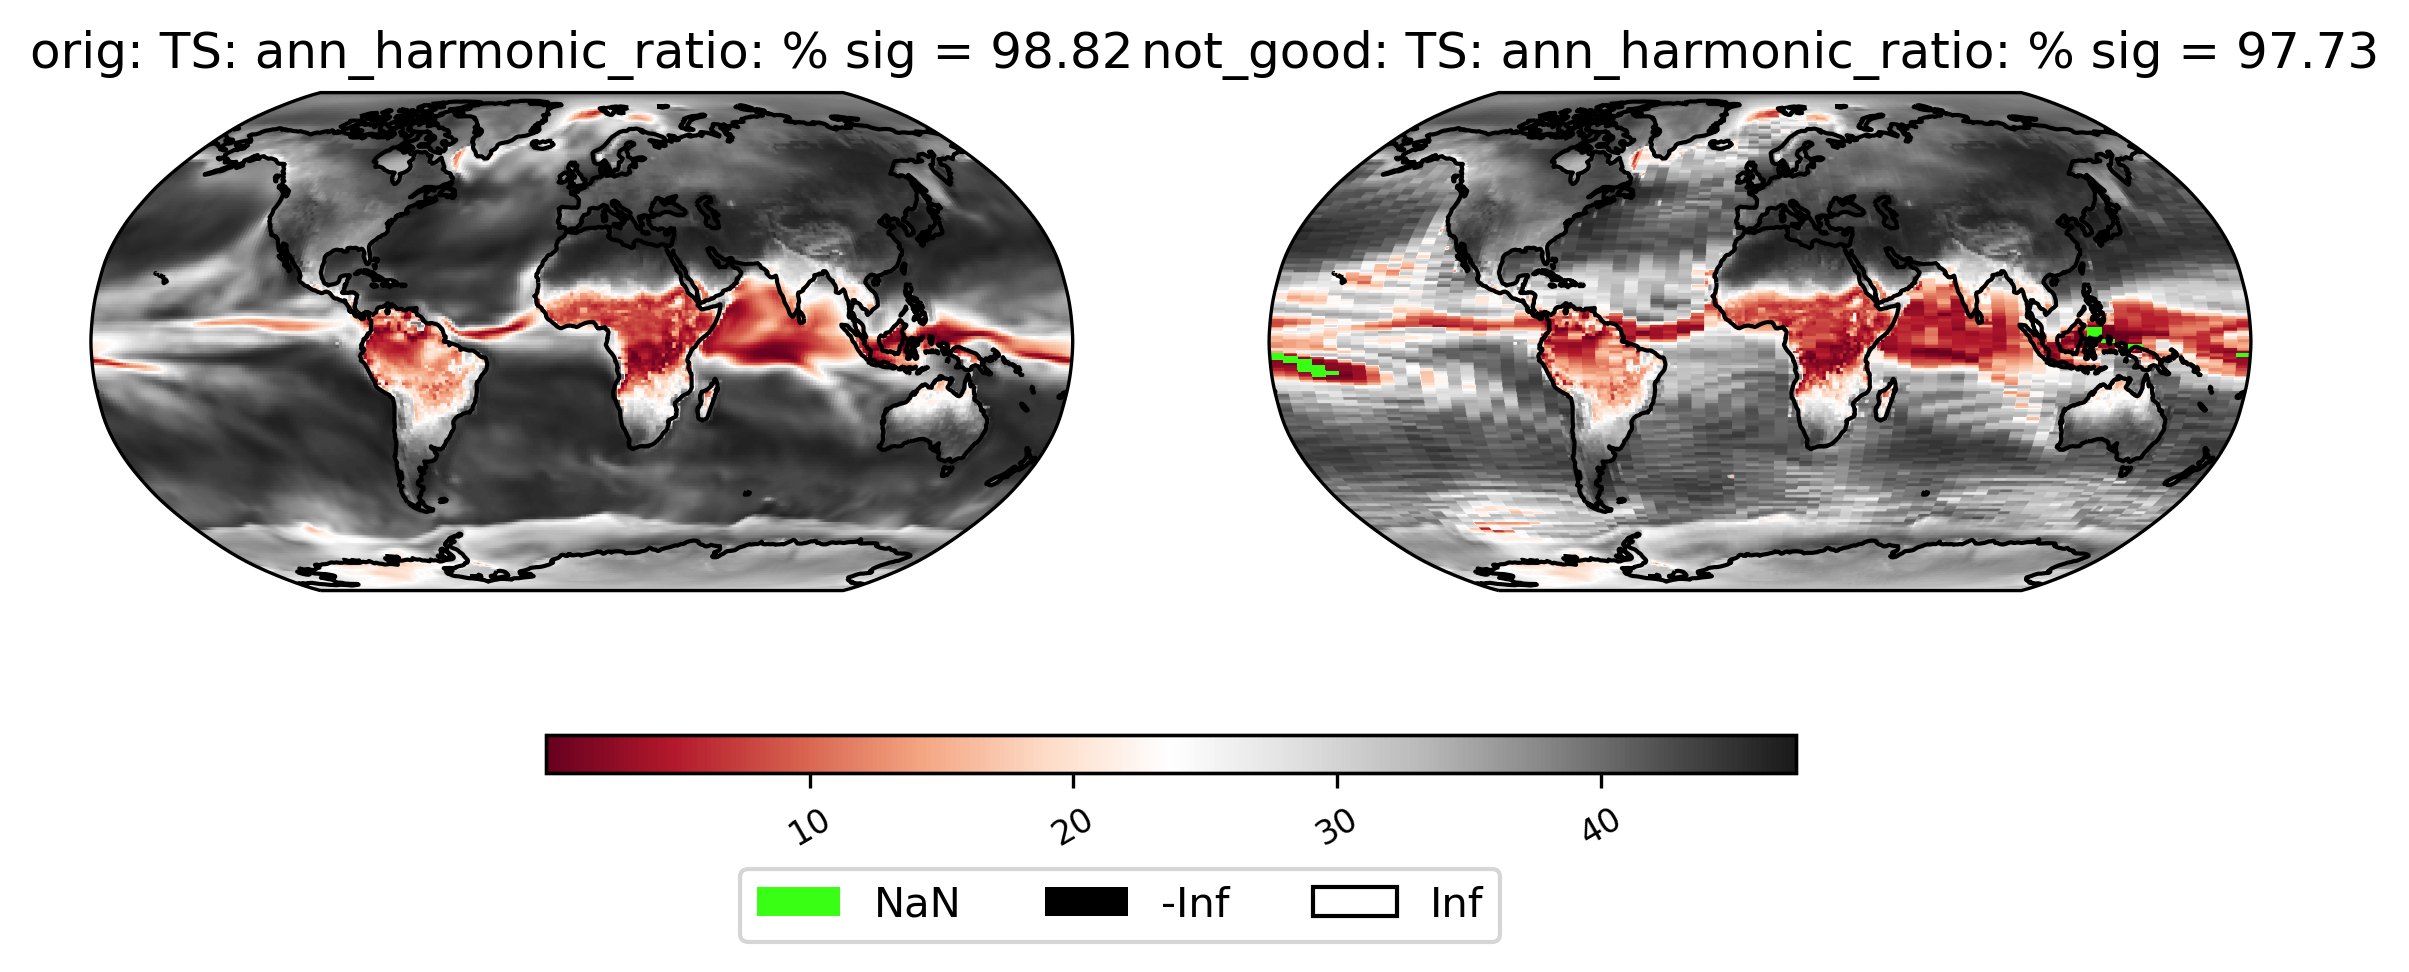

In [18]:
ldcpy.plot(
    cols_daily["TS"],
    "TS",
    sets=["orig", "not_good"],
    color="RdGy",
    calc_type="raw",
    calc="ann_harmonic_ratio",
)